PROJECT - Chennai house price prediction

In [588]:
# importing the necessary libraries
#analysis
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

#validation
from sklearn.model_selection import cross_val_score


#preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



In [589]:
# loading dataset

data = pd.read_csv("train-chennai-sale.csv")
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [590]:
# to view all columns
pd.set_option("display.max_columns",50)

In [591]:
# to get the number of rows and columns
data.shape

(7109, 22)

In [592]:
# to check if null values are present
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

#dataset has null values

# DATA CLEANING

# 1. CLEANING CATEGORICAL COLUMNS

In [593]:
# looking at the categorical columns
data["AREA"].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [594]:
data["AREA"].replace({"Chrompt":"Chrompet",
                    "Chrmpet":"Chrompet",
                    "Chormpet":"Chrompet",
                    "Karapakam":"Karapakkam",
                    "KKNagar":"KK Nagar",
                    "Velchery":"Velachery",
                    "Ann Nagar":"Anna Nagar",
                    "Ana Nagar":"Anna Nagar",
                    "Adyr":"Adyar",
                    "TNagar":"T Nagar"},inplace=True)

In [595]:
data["AREA"].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [596]:
data["SALE_COND"].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [597]:
#replacing sale_cond
data["SALE_COND"].replace({"Ab Normal":"AbNormal",
                           "Partiall":"Partial",
                           "PartiaLl":"Partial",
                           "Adj Land":"AdjLand"},inplace=True)

In [598]:
data["BUILDTYPE"].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [599]:
data["BUILDTYPE"].replace({"Comercial":"Commercial",
                          "Other":"Others"},inplace=True)

In [600]:
data["UTILITY_AVAIL"].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [601]:
data["UTILITY_AVAIL"].replace("All Pub","AllPub",inplace=True)

In [602]:
data["STREET"].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [603]:
data["STREET"].replace({"Pavd":"Paved",
                       "NoAccess":"No Access"},inplace=True)

In [604]:
data["PARK_FACIL"].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [605]:
data["PARK_FACIL"].replace("Noo","No",inplace=True)

In [606]:
data["MZZONE"].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

# 2. CLEANING NUMERICAL COLUMNS

In [607]:
# Correcting dtype of (Date column) from object to datetime format
data.DATE_SALE = pd.to_datetime(data.DATE_SALE, format='%d-%m-%Y')
data.DATE_BUILD = pd.to_datetime(data.DATE_BUILD, format='%d-%m-%Y')

# Creating AGE_OF_PROPERTY column 
data["AGE_OF_PROPERTY"] = pd.DatetimeIndex(data.DATE_SALE).year - pd.DatetimeIndex(data.DATE_BUILD).year


In [608]:
data["AGE_OF_PROPERTY"].head()

0    44
1    11
2    20
3    22
4    30
Name: AGE_OF_PROPERTY, dtype: int64

# 2.1 null values

In [609]:
# dealing with null values

data.isnull().sum()

PRT_ID              0
AREA                0
INT_SQFT            0
DATE_SALE           0
DIST_MAINROAD       0
N_BEDROOM           1
N_BATHROOM          5
N_ROOM              0
SALE_COND           0
PARK_FACIL          0
DATE_BUILD          0
BUILDTYPE           0
UTILITY_AVAIL       0
STREET              0
MZZONE              0
QS_ROOMS            0
QS_BATHROOM         0
QS_BEDROOM          0
QS_OVERALL         48
REG_FEE             0
COMMIS              0
SALES_PRICE         0
AGE_OF_PROPERTY     0
dtype: int64

In [610]:
# taking only numerical columns to choose best approach

num = ["int32","int64","float32","float64"]
numerical_features = (data.select_dtypes(include=num))
numerical_features


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_PROPERTY
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,237000,74063,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,3.0,2.2,2.4,2.520,208767,107060,5353000,49
7105,1897,52,3.0,2.0,5,3.6,4.5,3.3,3.920,346191,205551,10818480,9
7106,1614,152,2.0,1.0,4,4.3,4.2,2.9,3.840,317354,167028,8351410,28
7107,787,40,1.0,1.0,2,4.6,3.8,4.1,4.160,425350,119098,8507000,32


2.1.1 FIRST-APPROACH 

==> # Dropping the features with null values

In [611]:
num_features = numerical_features.copy()
num_features.dropna(axis=1,inplace=True)

In [612]:
#choosing the model-random forest regressor to determine the best approach
#defining the model to test
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

In [613]:
# splliting the train and test data
X1 = num_features.drop("SALES_PRICE",axis=1)
y1 = num_features.SALES_PRICE

X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=0)

print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(5687, 9)
(1422, 9)
(5687,)
(1422,)


In [614]:
model_1 = RandomForestRegressor(n_estimators=10,random_state=0)

model_1.fit(X1_train,y1_train)

y1_pred = model_1.predict(X1_test)
MAE_DROP = mean_absolute_error(y1_test,y1_pred)
print(MAE_DROP)


1287074.0720815752


2.1.2 SECOND APPROACH

==> # Imputing the null values - by mode value for N_BEDROOM and N_BATHROOM

In [615]:
num_features_2 = numerical_features.copy()

In [616]:
print(num_features_2["N_BEDROOM"].mode())
print(num_features_2["N_BATHROOM"].mode())

0    1.0
Name: N_BEDROOM, dtype: float64
0    1.0
Name: N_BATHROOM, dtype: float64


#since the dtypes of N_BEDROOM and N_BATHROOM are wrongly filled by float object we will convert to correct dtype after imputing null values

In [617]:
num_features_2 = numerical_features.copy()
num_features_2["N_BEDROOM"] = num_features_2["N_BEDROOM"].fillna(1.0)   


In [618]:
num_features_2["N_BATHROOM"] = num_features_2["N_BATHROOM"].fillna(1.0)

In [619]:
# for QS_OVERALL column we use mean
num_features_2["QS_OVERALL"] = num_features_2["QS_OVERALL"].fillna(num_features_2["QS_OVERALL"].mean())

In [620]:
num_features_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   INT_SQFT         7109 non-null   int64  
 1   DIST_MAINROAD    7109 non-null   int64  
 2   N_BEDROOM        7109 non-null   float64
 3   N_BATHROOM       7109 non-null   float64
 4   N_ROOM           7109 non-null   int64  
 5   QS_ROOMS         7109 non-null   float64
 6   QS_BATHROOM      7109 non-null   float64
 7   QS_BEDROOM       7109 non-null   float64
 8   QS_OVERALL       7109 non-null   float64
 9   REG_FEE          7109 non-null   int64  
 10  COMMIS           7109 non-null   int64  
 11  SALES_PRICE      7109 non-null   int64  
 12  AGE_OF_PROPERTY  7109 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 722.1 KB


In [621]:
X2 = num_features_2.drop("SALES_PRICE",axis=1)
y2 = num_features_2.SALES_PRICE

In [622]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2,random_state=0)

In [623]:
model_2 = RandomForestRegressor(n_estimators=10,random_state=0)
model_2.fit(X2_train,y2_train)
y2_pred = model_2.predict(X2_test)
MAE_IMPUTE = mean_absolute_error(y2_test,y2_pred)
print(MAE_IMPUTE)

1093957.7433192686


In [624]:
print("MAE_DROP :", MAE_DROP)
print("MAE_IMPUTE :",MAE_IMPUTE)

MAE_DROP : 1287074.0720815752
MAE_IMPUTE : 1093957.7433192686


#from the above we can infer that "IMPUTING NULL VALUES" performs better than "DROPPING NULL VALUES" in this dataset

In [625]:
# changing the dtype of N_BEDROOM and N_BATHROOOM
# Fixing the correct Data Type of columns

num_features_2.N_BEDROOM = num_features_2.N_BEDROOM.astype(int)
num_features_2.N_BATHROOM = num_features_2.N_BATHROOM.astype(int)

#CLEANED NUMERICAL VALUES

In [626]:
final_numerical_features = num_features_2

final_numerical_features.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_PROPERTY
0,1004,131,1,1,3,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,1986,26,2,1,5,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,909,70,1,1,3,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,1855,14,3,2,5,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,1226,84,1,1,3,3.0,2.5,4.1,3.290,237000,74063,7406250,30


In [627]:
final_numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   INT_SQFT         7109 non-null   int64  
 1   DIST_MAINROAD    7109 non-null   int64  
 2   N_BEDROOM        7109 non-null   int32  
 3   N_BATHROOM       7109 non-null   int32  
 4   N_ROOM           7109 non-null   int64  
 5   QS_ROOMS         7109 non-null   float64
 6   QS_BATHROOM      7109 non-null   float64
 7   QS_BEDROOM       7109 non-null   float64
 8   QS_OVERALL       7109 non-null   float64
 9   REG_FEE          7109 non-null   int64  
 10  COMMIS           7109 non-null   int64  
 11  SALES_PRICE      7109 non-null   int64  
 12  AGE_OF_PROPERTY  7109 non-null   int64  
dtypes: float64(4), int32(2), int64(7)
memory usage: 666.6 KB


#we had imputed the null values because it is the best approach for this dataset

# EDA- Exploratory Data Analysis

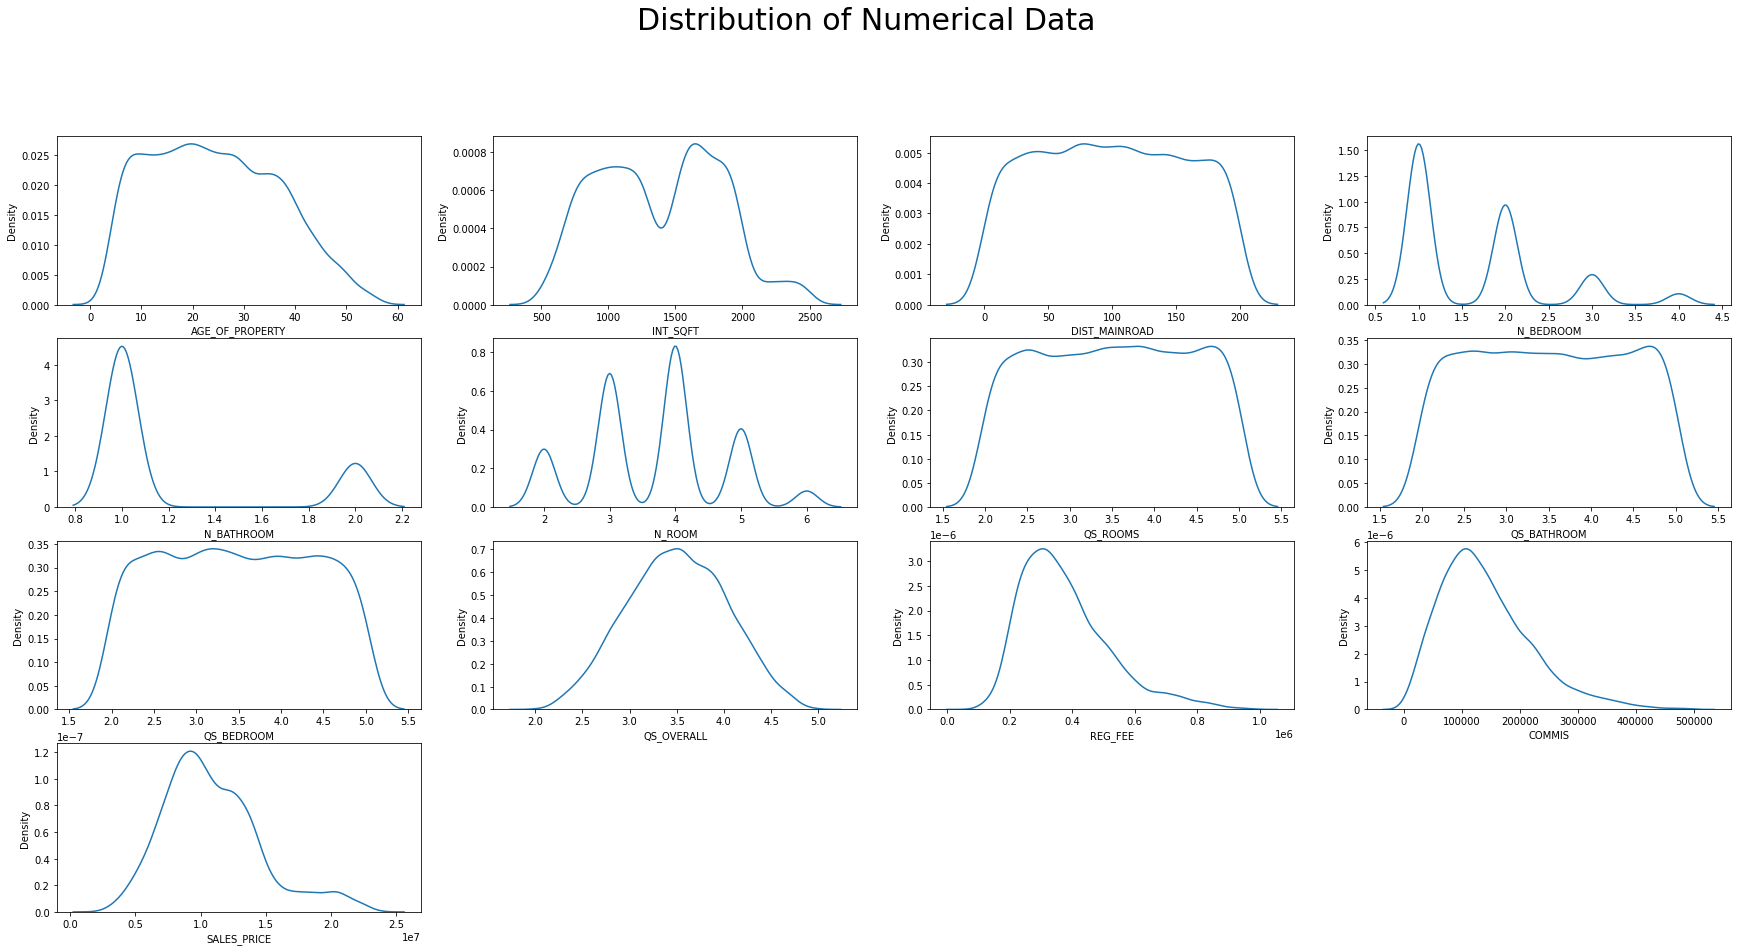

In [628]:
# Distribution of numerical data

plt.figure(figsize=(30, 18))

plt.subplot(5,4,1)
sns.kdeplot(data.AGE_OF_PROPERTY)

plt.subplot(5,4,2)
sns.kdeplot(data.INT_SQFT)

plt.subplot(5,4,3)
sns.kdeplot(data.DIST_MAINROAD)

plt.subplot(5,4,4)
sns.kdeplot(data.N_BEDROOM)

plt.subplot(5,4,5)
sns.kdeplot(data.N_BATHROOM)

plt.subplot(5,4,6)
sns.kdeplot(data.N_ROOM)

plt.subplot(5,4,7)
sns.kdeplot(data.QS_ROOMS)

plt.subplot(5,4,8)
sns.kdeplot(data.QS_BATHROOM)

plt.subplot(5,4,9)
sns.kdeplot(data.QS_BEDROOM)

plt.subplot(5,4,10)
sns.kdeplot(data.QS_OVERALL)

plt.subplot(5,4,11)
sns.kdeplot(data.REG_FEE)

plt.subplot(5,4,12)
sns.kdeplot(data.COMMIS)

plt.subplot(5,4,13)
sns.kdeplot(data.SALES_PRICE)

plt.suptitle("Distribution of Numerical Data", fontsize=30)
plt.show()

#continuous numerical variable and sales price

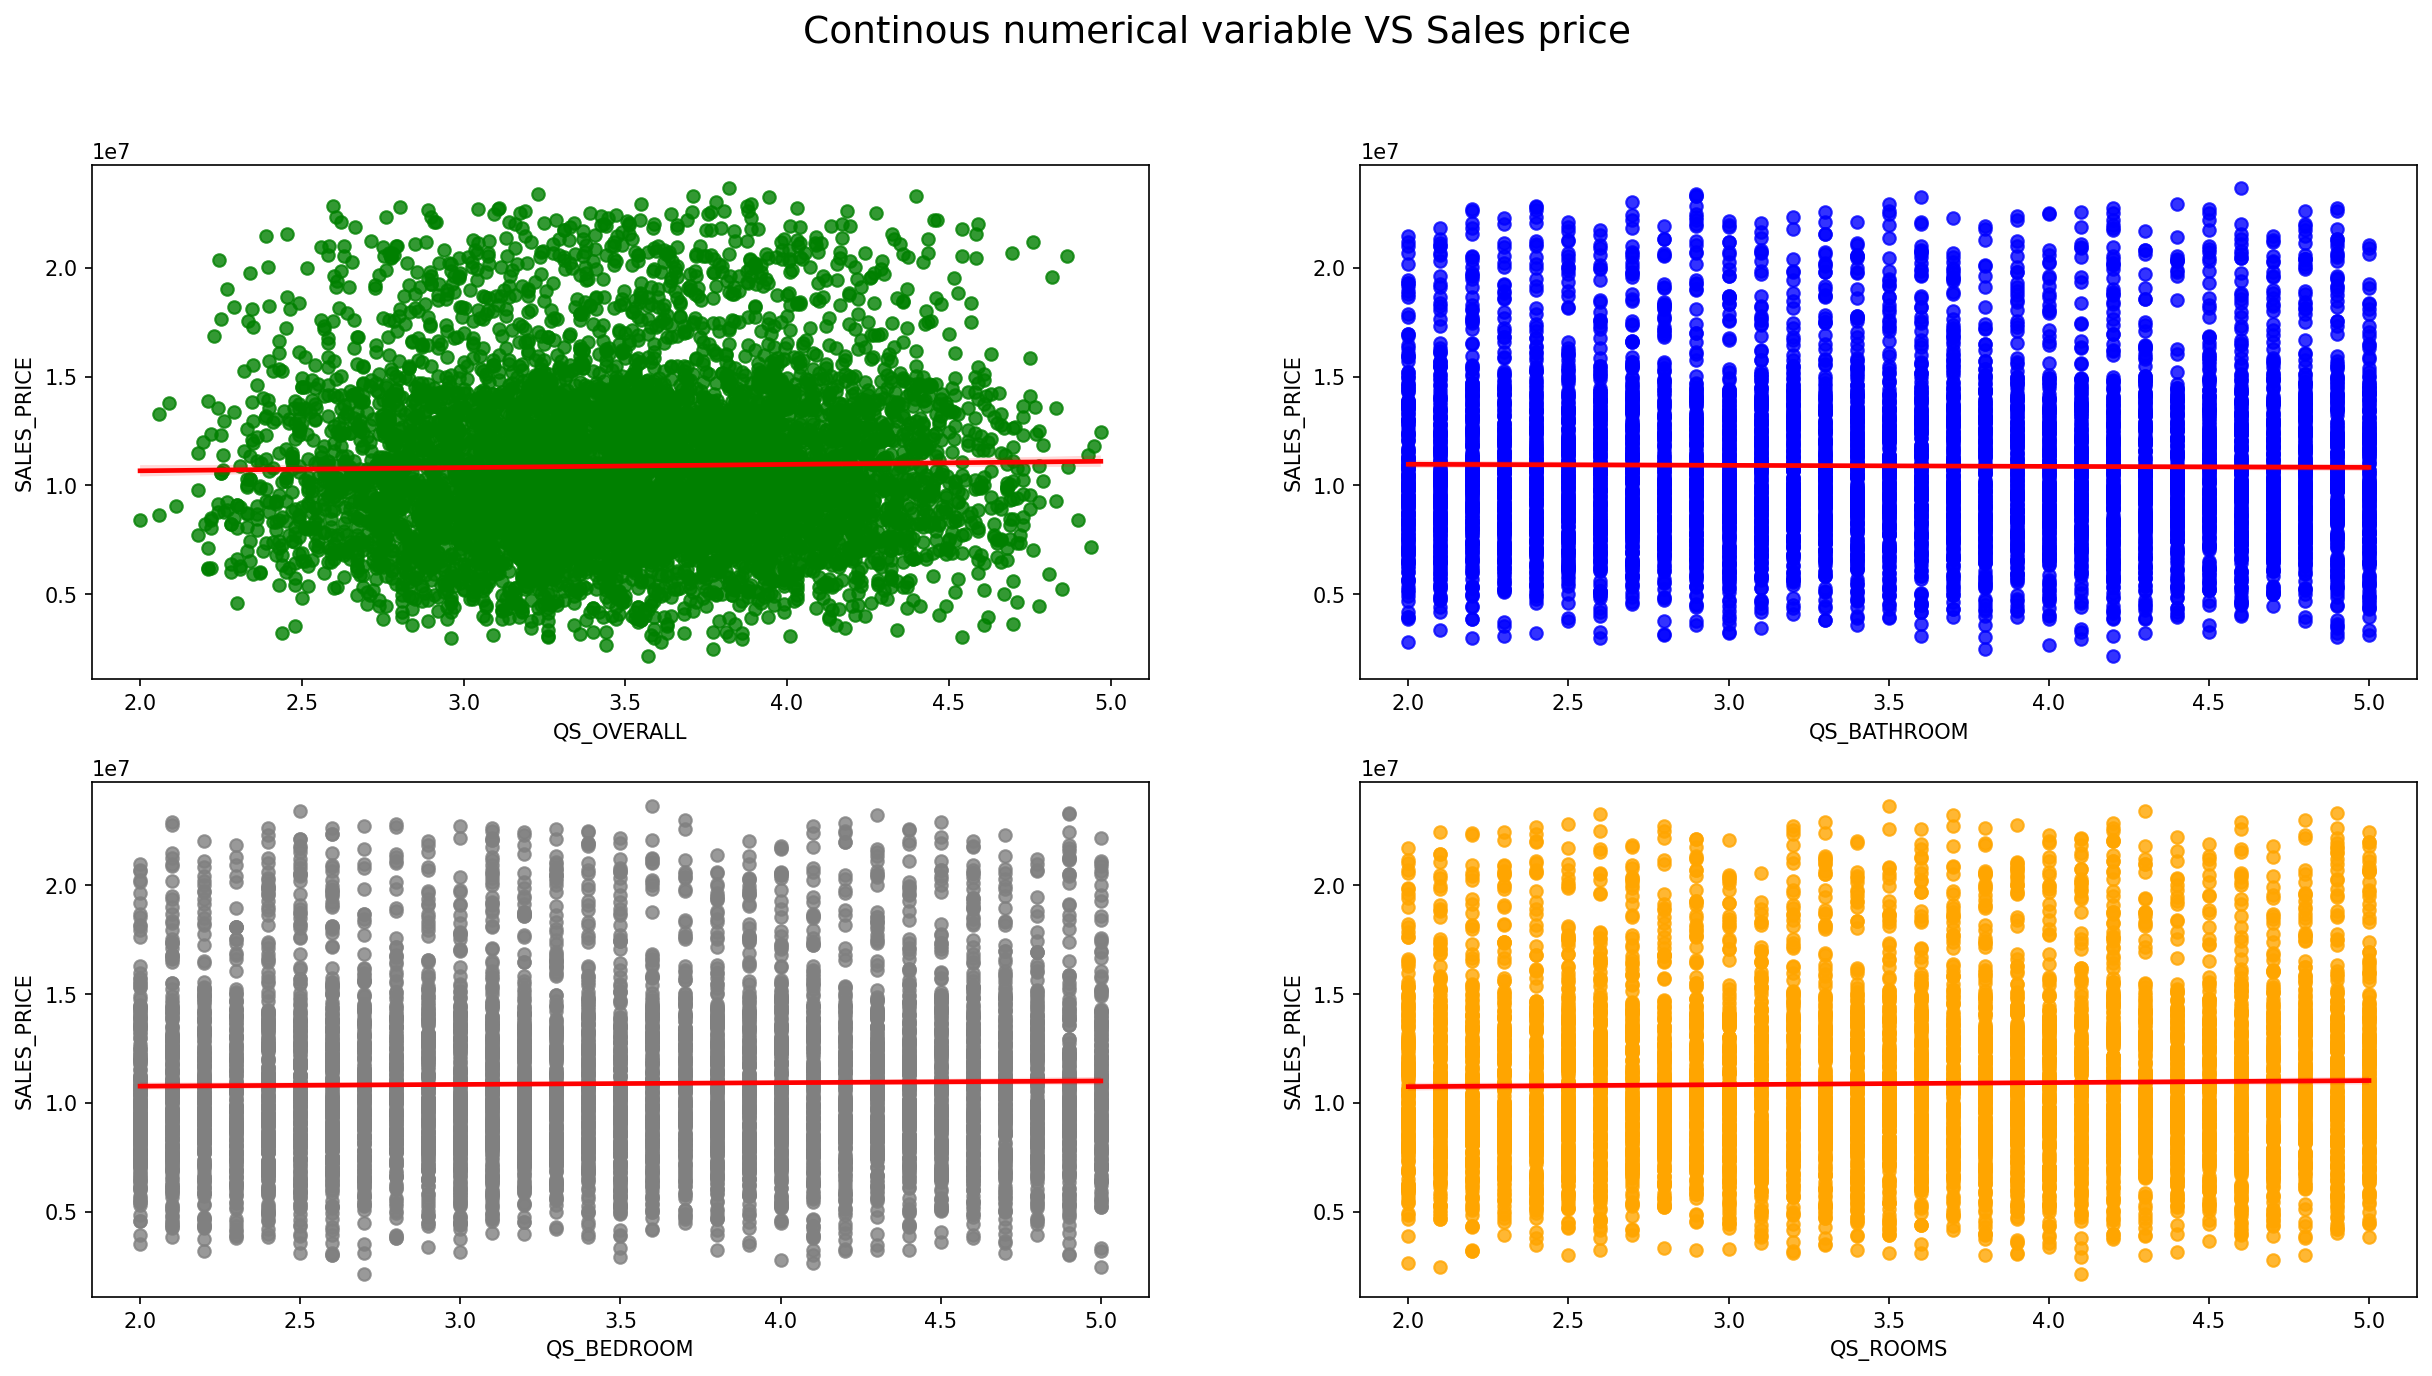

In [629]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.regplot(x = data.QS_OVERALL, y = data.SALES_PRICE, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot(2,2,2)
sns.regplot(x = data.QS_BATHROOM, y = data.SALES_PRICE, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(2,2,3)
sns.regplot(x = data.QS_BEDROOM, y = data.SALES_PRICE, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(2,2,4)
sns.regplot(x = data.QS_ROOMS, y = data.SALES_PRICE, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.suptitle("Continous numerical variable VS Sales price", fontsize=18)
plt.show()

#since these columns ["QS_OVERALL","QS_ROOMS","QS_BEDROOM","QS_BATHROOM"] have no relation with target variable, we can drop them

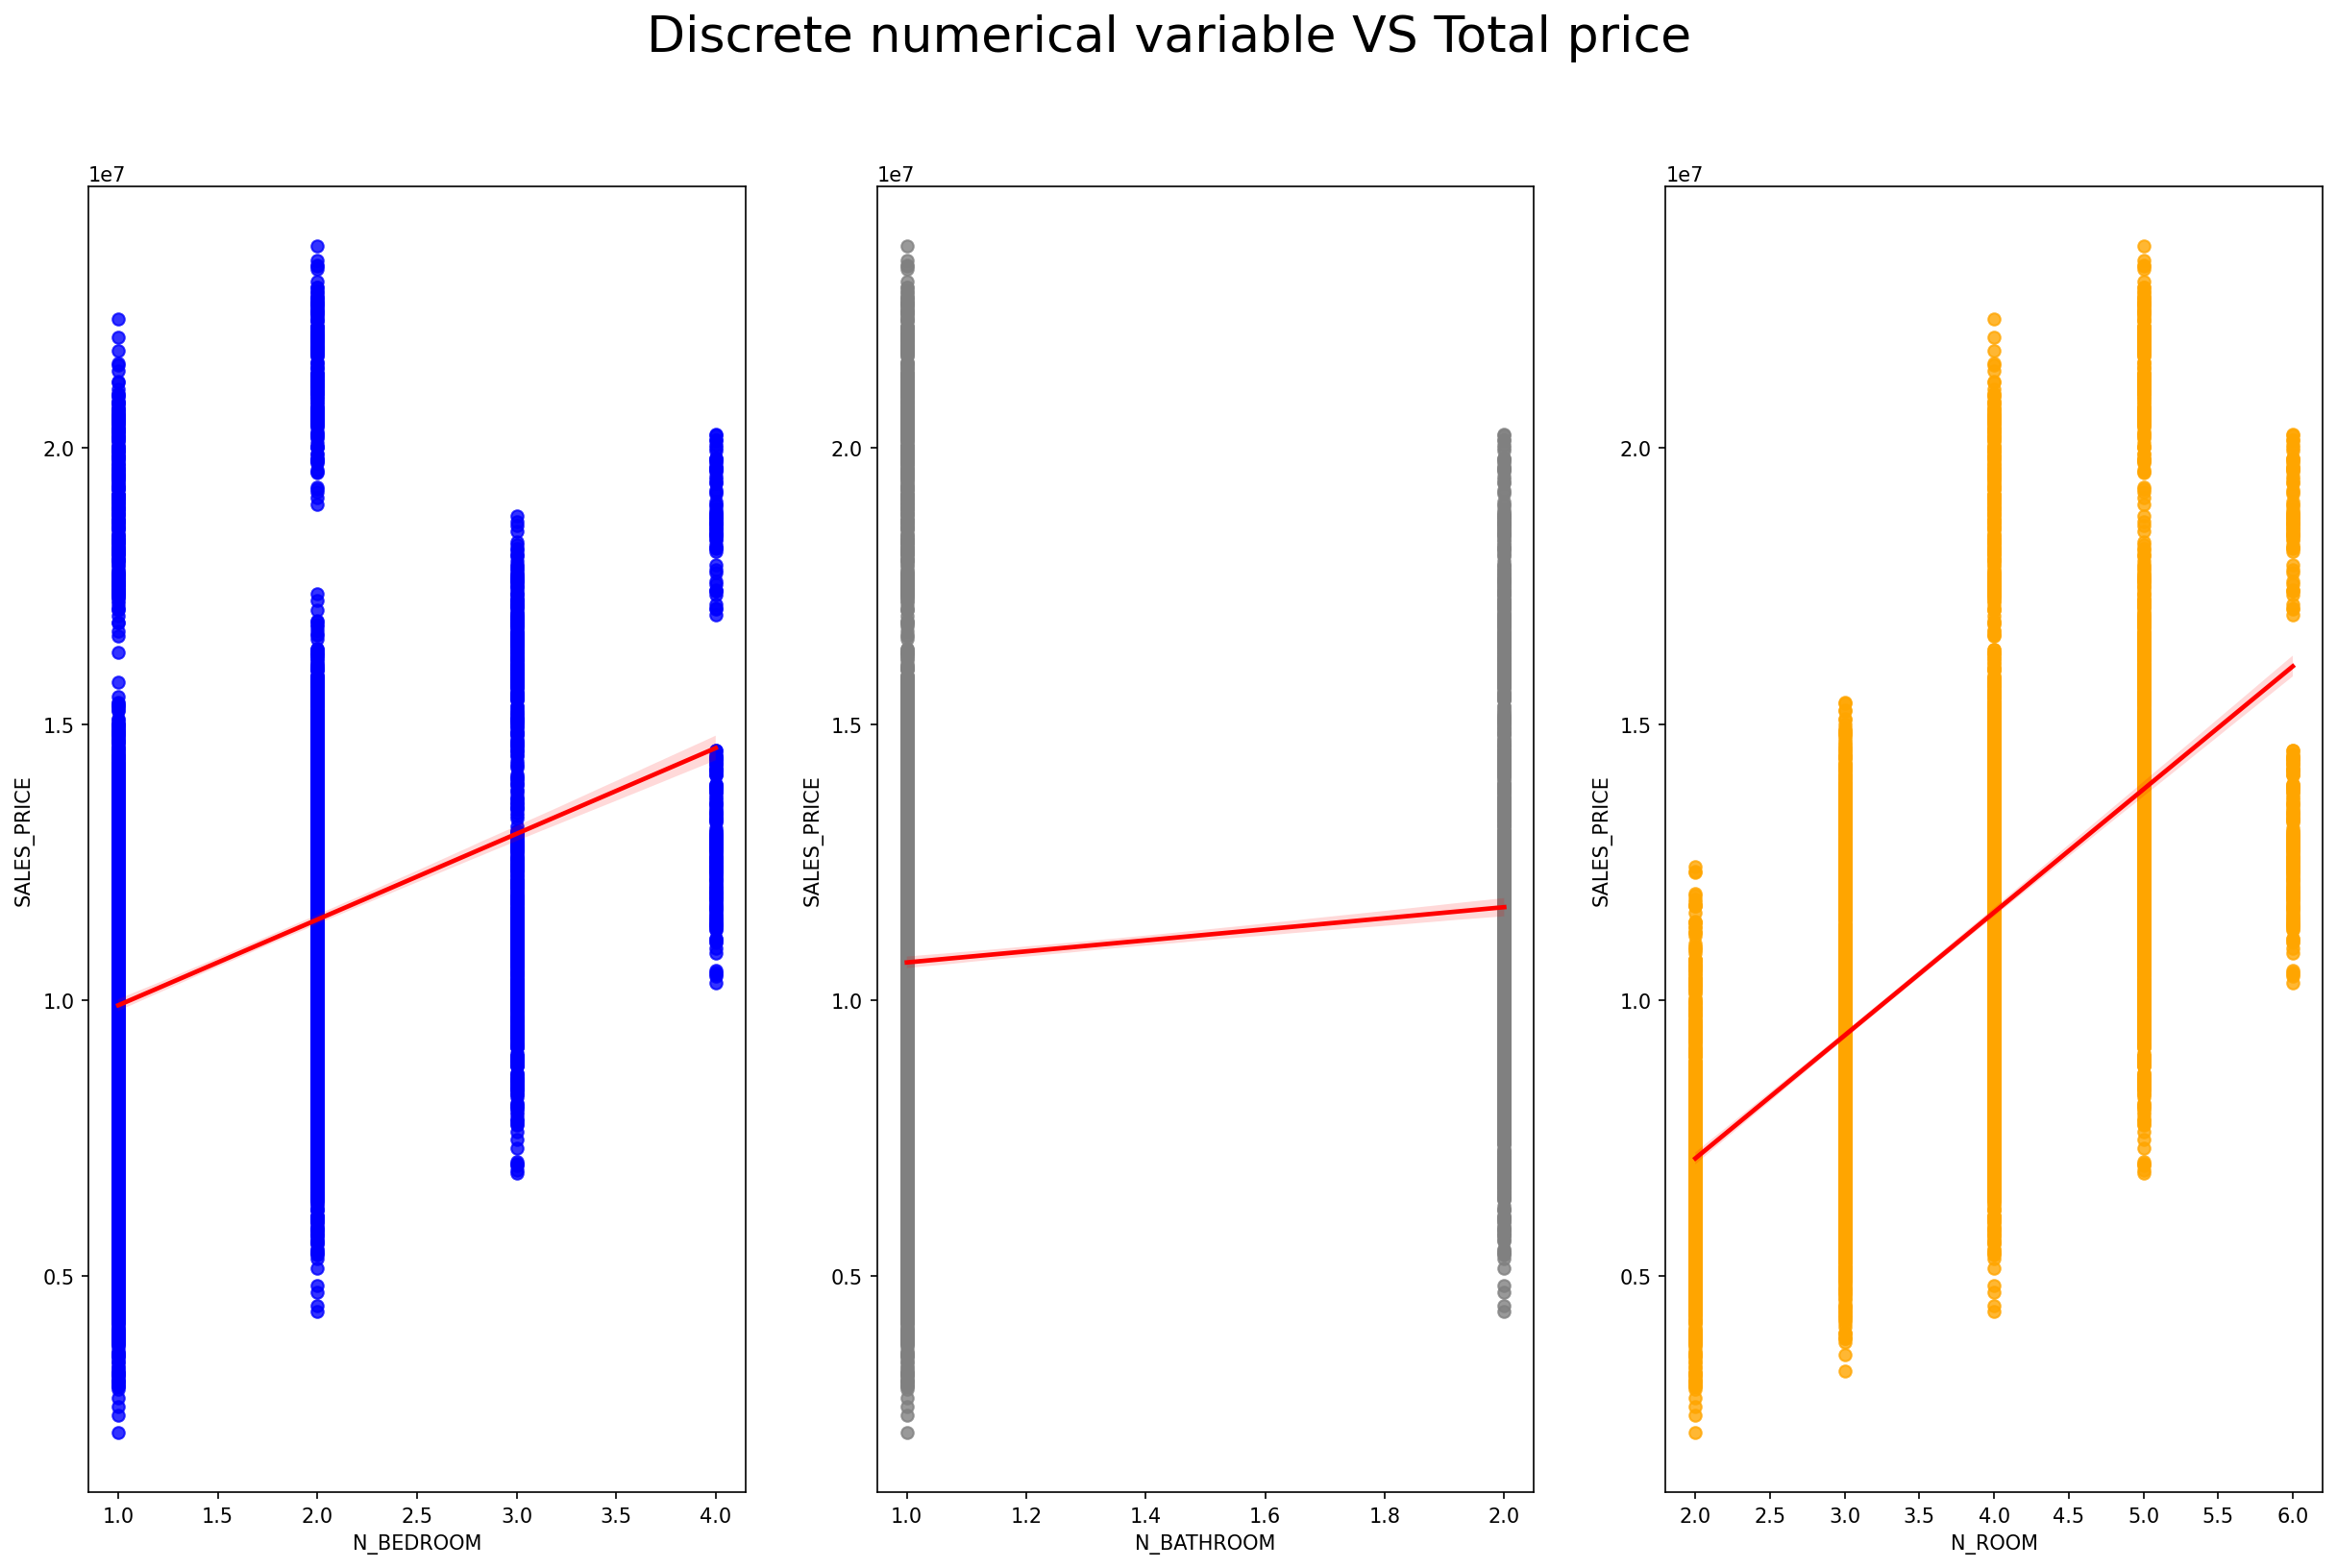

In [630]:
plt.figure(figsize=(20,12), dpi=150)

plt.subplot(1,3,1)
sns.regplot(x=data.N_BEDROOM, y=data.SALES_PRICE, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(1,3,2)
sns.regplot(x=data.N_BATHROOM, y=data.SALES_PRICE, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(1,3,3)
sns.regplot(x=data.N_ROOM, y=data.SALES_PRICE, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.suptitle("Discrete numerical variable VS Total price", fontsize=25)
plt.show()

#["N_BEDROOM","N_BATHROOM","N_ROOM"] highly corelated with target

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

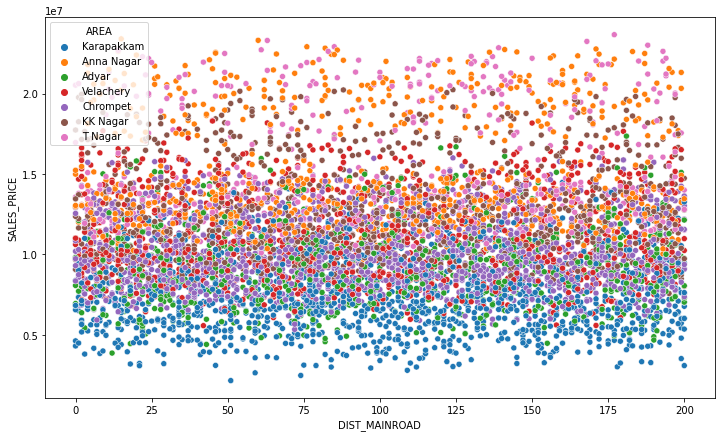

In [631]:
# plotting distance from mainroad with sales_price
plt.figure(figsize=(12,7))
sns.scatterplot(data=data,x="DIST_MAINROAD", y="SALES_PRICE",hue="AREA")

#column ["DIST_MAINROAD] hae no relation with target variable, we can drop it

<AxesSubplot:xlabel='SALES_PRICE', ylabel='REG_FEE'>

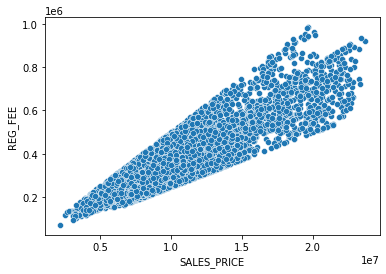

In [632]:
# REG_FEE column
# plt.figure(figsize=(8,8))
sns.scatterplot(data=data,x="SALES_PRICE",y="REG_FEE")


<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

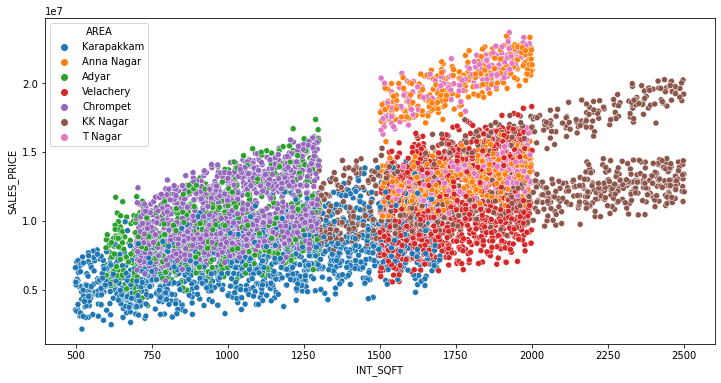

In [633]:
# INT_SQFT column
plt.figure(figsize=(12,6))
sns.scatterplot(data=data,x="INT_SQFT", y="SALES_PRICE",hue="AREA")

#["INT_SQFT"] has positive correlation with target variable

<Figure size 1008x432 with 0 Axes>

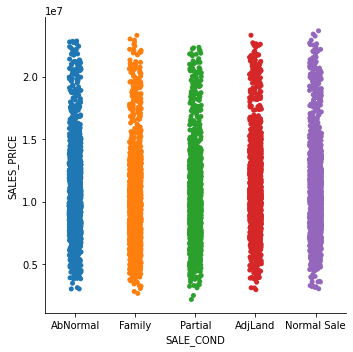

In [634]:
plt.figure(figsize=(14,6))
sns.catplot(data=data,x="SALE_COND", y="SALES_PRICE")

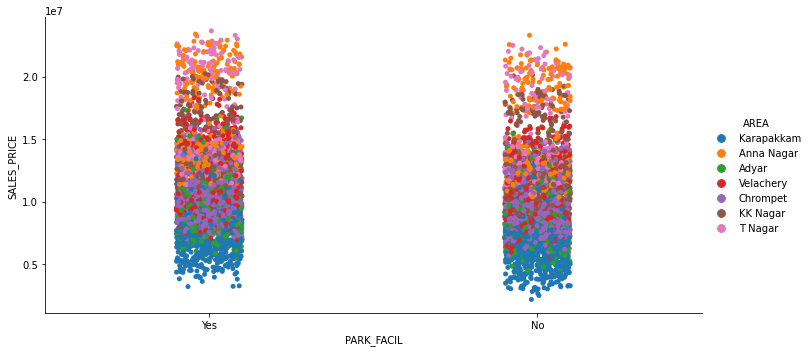

In [635]:
sns.catplot(data=data,x="PARK_FACIL", y="SALES_PRICE",hue="AREA",height=5,aspect=2)

<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='SALES_PRICE'>

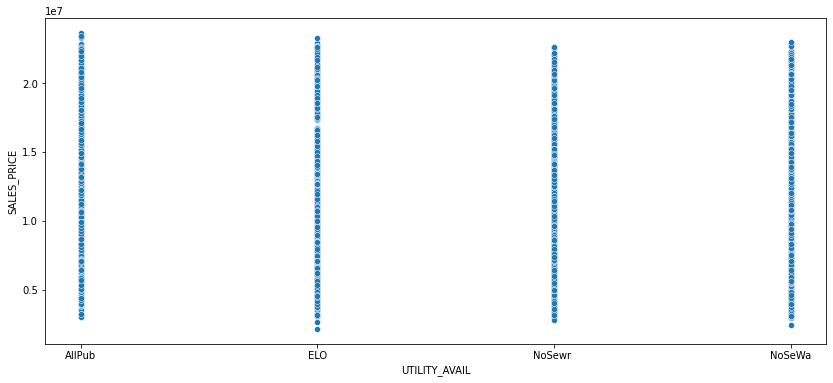

In [636]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=data,x="UTILITY_AVAIL", y="SALES_PRICE")

#["SALE_COND"] feature performs moreover same for all the categories in it, it's like a constant feature

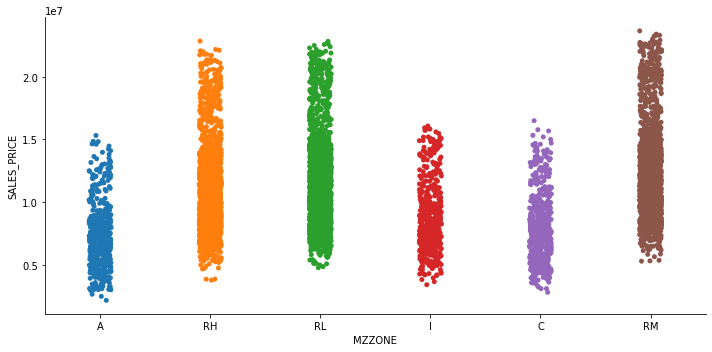

In [637]:
sns.catplot(data=data,x="MZZONE", y="SALES_PRICE",height=5,aspect=2)

#["MZZONE"] ==> buildings in the zones RH, RL, RM are highly priced than houses on other zones

<AxesSubplot:xlabel='BUILDTYPE', ylabel='SALES_PRICE'>

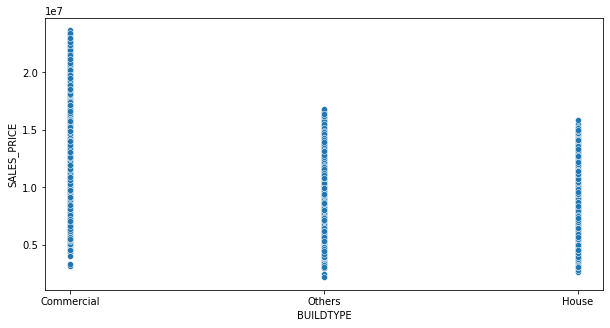

In [638]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x="BUILDTYPE", y="SALES_PRICE")

#more COMMERCIAL buildings are highly priced than house and other buildtypes

<AxesSubplot:xlabel='AREA', ylabel='count'>

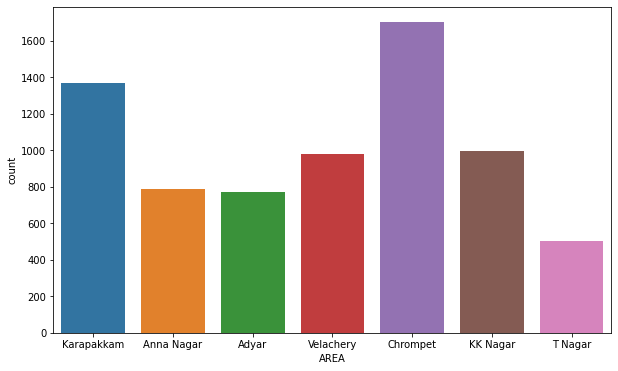

In [639]:
# houses in area
plt.figure(figsize=(10,6))
sns.countplot(x=data["AREA"]) 

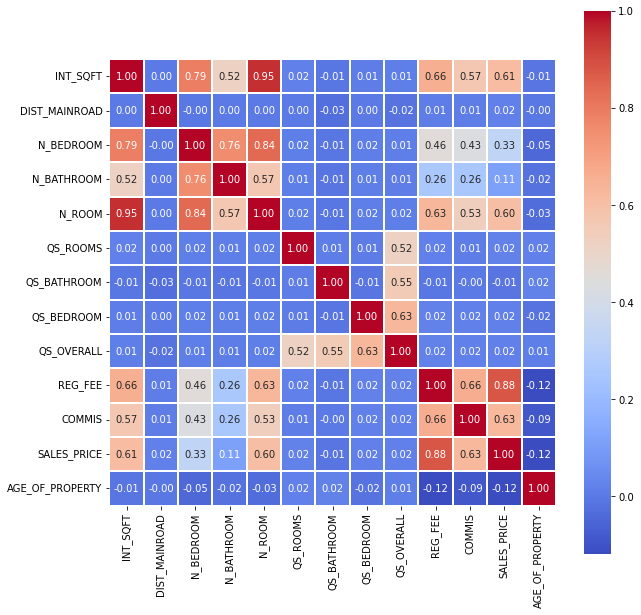

In [640]:
# correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",cmap="coolwarm",square=True,linewidth=0.1)
plt.show()

from the heatmap ["N_ROOM"] AND ["INT_SQFT"] are highly correlated with each other so we can drop one of them

==> looking at the correlation with ["SALES_PRICE"], the column ["INT_SQFT"] has higher correlation with target, we drop ["N_ROOM"]

==> ["DIST_MAINROAD"] has no correlation with target we drop it

==> then the columns["QS_ROOMS","QS_QS_BEDROOM","QS_BATHROOM","QS_OVERALL"] has no relation with target so we drop them also. 

# 3. ENCODING CATEGORICAL VARIABLE

In [641]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE_OF_PROPERTY'],
      dtype='object')

In [642]:
# categorical columns

# to get categorical features
cat = ["object"]
categorical_features = data.select_dtypes(include=cat)

categorical_features.head() 

,PRT_ID,AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,P03210,Karapakkam,AbNormal,Yes,Commercial,AllPub,Paved,A
1,P09411,Anna Nagar,AbNormal,No,Commercial,AllPub,Gravel,RH
2,P01812,Adyar,AbNormal,Yes,Commercial,ELO,Gravel,RL
3,P05346,Velachery,Family,No,Others,NoSewr,Paved,I
4,P06210,Karapakkam,AbNormal,Yes,Others,AllPub,Gravel,C


#["PRT_ID"] is just the id of the property so we drop them

#from the above charts we can infer that ["UTILITY_AVAIL"], performs same for all the categories in it(constant feature)

In [643]:
categorical_features.drop(["PRT_ID","UTILITY_AVAIL"],axis=1,inplace=True)

#ordinal encoding

In [644]:
# now we encode the features ["PARK_FACIL","STREET","MZZONE","SALE_COND"] bY ordinal encoding
# Encoding the ["PARK_FACIL"] column order-wise 
categorical_features["PARK_FACIL"] = categorical_features["PARK_FACIL"].replace({'Yes':1,
                                       'No':0})

                                          
# Encoding the ["STREET"] column order-wise 
categorical_features["STREET"] = categorical_features["STREET"].replace({'No Access' : 0,
                                        'Gravel': 1, 
                                        'Paved' : 2})


# Encoding the ["MZZONE"] column order-wise 
categorical_features["MZZONE"] = categorical_features["MZZONE"].replace({'A' : 1,
                                        'C' : 2,
                                        'I' : 3,
                                        'RH' : 4,
                                        'RL' : 5,
                                        'RM' : 6})

# Encoding the ["SALE_COND"] column order-wise 
categorical_features["SALE_COND"] = categorical_features["SALE_COND"].replace({'Family' : 1,                                        
                                        'AbNormal' : 2,
                                        'Normal Sale' : 3,
                                        'Partial' : 4,
                                        'AdjLand' : 5,
                                        })                                        

categorical_features.head()                                       

,AREA,SALE_COND,PARK_FACIL,BUILDTYPE,STREET,MZZONE
0,Karapakkam,2,1,Commercial,2,1
1,Anna Nagar,2,0,Commercial,1,4
2,Adyar,2,1,Commercial,1,5
3,Velachery,1,0,Others,2,3
4,Karapakkam,2,1,Others,1,2


In [645]:
# for columns ["AREA","BUILDTYPE"] use use onehot encoder

categorical_features = pd.get_dummies(categorical_features,columns=["AREA","BUILDTYPE"],drop_first=True)

categorical_features.head()

,SALE_COND,PARK_FACIL,STREET,MZZONE,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,BUILDTYPE_House,BUILDTYPE_Others
0,2,1,2,1,0,0,0,1,0,0,0,0
1,2,0,1,4,1,0,0,0,0,0,0,0
2,2,1,1,5,0,0,0,0,0,0,0,0
3,1,0,2,3,0,0,0,0,0,1,0,1
4,2,1,1,2,0,0,0,1,0,0,0,1


In [646]:
categorical_features.shape

(7109, 12)

In [647]:
# joining two dataframes, 1.imputed null values, 2. categorical features

final_dataset = pd.concat([final_numerical_features,categorical_features],axis=1)
final_dataset.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_PROPERTY,SALE_COND,PARK_FACIL,STREET,MZZONE,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,BUILDTYPE_House,BUILDTYPE_Others
0,1004,131,1,1,3,4.0,3.9,4.9,4.330,380000,144400,7600000,44,2,1,2,1,0,0,0,1,0,0,0,0
1,1986,26,2,1,5,4.9,4.2,2.5,3.765,760122,304049,21717770,11,2,0,1,4,1,0,0,0,0,0,0,0
2,909,70,1,1,3,4.1,3.8,2.2,3.090,421094,92114,13159200,20,2,1,1,5,0,0,0,0,0,0,0,0
3,1855,14,3,2,5,4.7,3.9,3.6,4.010,356321,77042,9630290,22,1,0,2,3,0,0,0,0,0,1,0,1
4,1226,84,1,1,3,3.0,2.5,4.1,3.290,237000,74063,7406250,30,2,1,1,2,0,0,0,1,0,0,0,1


In [648]:
final_dataset.shape

(7109, 25)

# checking outliers on the target variable

In [649]:
y1= final_dataset.SALES_PRICE

In [650]:
y1.head()

0     7600000
1    21717770
2    13159200
3     9630290
4     7406250
Name: SALES_PRICE, dtype: int64

<AxesSubplot:>

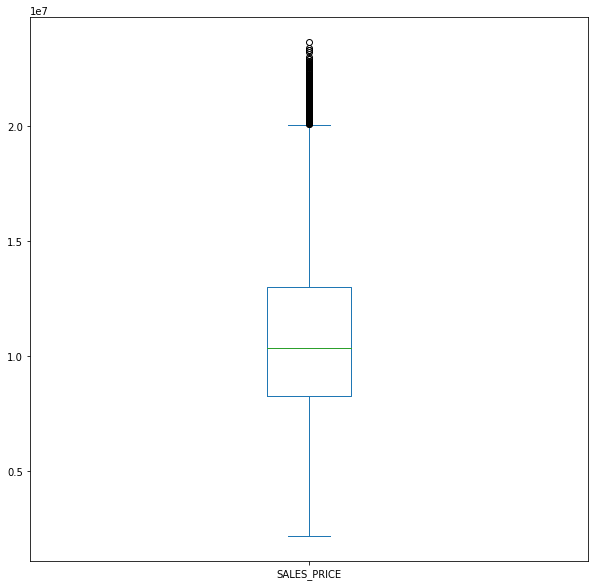

In [651]:
final_dataset["SALES_PRICE"].plot(kind="box",figsize=(10,10))

#we can infer that ouliers are present

#we plot the density plot to check whether the data is skewed or not

<AxesSubplot:xlabel='SALES_PRICE', ylabel='Density'>

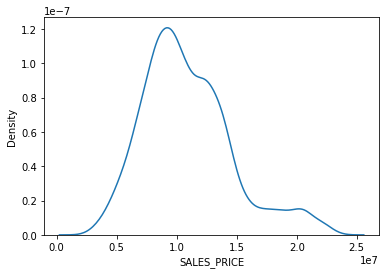

In [652]:
sns.kdeplot(final_dataset["SALES_PRICE"])

In [653]:
final_dataset.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [654]:
final_dataset.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE_OF_PROPERTY,SALE_COND,PARK_FACIL,STREET,MZZONE,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,BUILDTYPE_House,BUILDTYPE_Others
0,1004,131,1,1,3,4.0,3.9,4.9,4.330,380000,144400,7600000,44,2,1,2,1,0,0,0,1,0,0,0,0
1,1986,26,2,1,5,4.9,4.2,2.5,3.765,760122,304049,21717770,11,2,0,1,4,1,0,0,0,0,0,0,0
2,909,70,1,1,3,4.1,3.8,2.2,3.090,421094,92114,13159200,20,2,1,1,5,0,0,0,0,0,0,0,0
3,1855,14,3,2,5,4.7,3.9,3.6,4.010,356321,77042,9630290,22,1,0,2,3,0,0,0,0,0,1,0,1
4,1226,84,1,1,3,3.0,2.5,4.1,3.290,237000,74063,7406250,30,2,1,1,2,0,0,0,1,0,0,0,1


In [655]:
final_dataset.shape

(7109, 25)

In [656]:
quartile1 = final_dataset["SALES_PRICE"].quantile(0.25)
quartile3 = final_dataset["SALES_PRICE"].quantile(0.75)
iqr = quartile3 - quartile1
upper_limit = quartile3 + 1.5 * iqr
lower_limit = quartile1 - 1.5 * iqr 

lower_limit, upper_limit

(1189400.0, 20076600.0)

In [657]:
outlier_free_list = [x for x in final_dataset["SALES_PRICE"] if (
                  (x > lower_limit) & (x < upper_limit)
                  )]
filtered_data = final_dataset.loc[final_dataset["SALES_PRICE"].isin(outlier_free_list)]

filtered_data.shape

(6881, 25)

<AxesSubplot:xlabel='SALES_PRICE', ylabel='Density'>

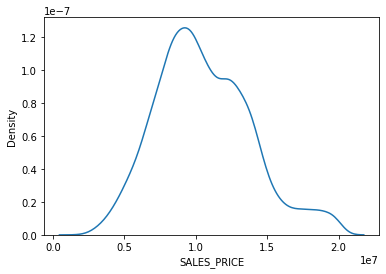

In [658]:
sns.kdeplot(filtered_data.SALES_PRICE)

In [659]:
filtered_data.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE',
       'COMMIS', 'SALES_PRICE', 'AGE_OF_PROPERTY', 'SALE_COND', 'PARK_FACIL',
       'STREET', 'MZZONE', 'AREA_Anna Nagar', 'AREA_Chrompet', 'AREA_KK Nagar',
       'AREA_Karapakkam', 'AREA_T Nagar', 'AREA_Velachery', 'BUILDTYPE_House',
       'BUILDTYPE_Others'],
      dtype='object')

In [660]:
X = filtered_data.drop("SALES_PRICE",axis=1)
y = filtered_data.SALES_PRICE


In [661]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

print("X_train shape : {}".format(X_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_train shape : {}".format(y_train.shape))
print("y_test shape : {}".format(y_test.shape))

X_train shape : (5504, 24)
X_test shape : (1377, 24)
y_train shape : (5504,)
y_test shape : (1377,)


In [662]:

lin_model = LinearRegression()

lin_model.fit(X_train,y_train)

y_test_pred = lin_model.predict(X_test)

print("MAE :",mean_absolute_error(y_test,y_test_pred))
R2_SCORE_LR  = r2_score(y_test,y_test_pred)
R2_SCORE_LR


MAE : 524379.5354263999


0.9592513744646648

In [663]:

rf_model = RandomForestRegressor(n_estimators=20,random_state=0)

rf_model.fit(X_train,y_train)

y_test_pred = rf_model.predict(X_test)

print("MAE :",mean_absolute_error(y_test,y_test_pred))

R2_SCORE_RF = r2_score(y_test,y_test_pred)
R2_SCORE_RF

MAE : 560479.272875817


0.954843375996408

In [664]:
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train,y_train)
y_test_pred = dt_model.predict(X_test)

print("MAE :",mean_absolute_error(y_test,y_test_pred))

R2_SCORE_DT = r2_score(y_test,y_test_pred)
R2_SCORE_DT

MAE : 748777.8576615831


0.9080310300379513

In [665]:

xgb_model = XGBRegressor(n_estimators=800,
                        learning_rate=0.05,
                        n_jobs=3)

xgb_model.fit(X_train,y_train,
            early_stopping_rounds=5,
            eval_set=[(X_test,y_test)],
            verbose=False
            )

xgb_pred  = xgb_model.predict(X_test)

print("MAE :",mean_absolute_error(y_test,xgb_pred))
R2_SCORE_XGB = r2_score(y_test,xgb_pred)
R2_SCORE_XGB

c:\Users\aswin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


MAE : 289496.3378721859


0.987725712545222

In [666]:
R2_scores = pd.DataFrame({"LinearRegression":R2_SCORE_LR,
                        "RandomForest":R2_SCORE_RF,
                        "DecisionTree":R2_SCORE_DT,
                        "XGB":R2_SCORE_XGB},index=[0])

R2_scores                        

,LinearRegression,RandomForest,DecisionTree,XGB
0,0.959251,0.954843,0.908031,0.987726
